In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


In [5]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"

columns = [
    'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
    'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'
]

data = pd.read_csv(url, names=columns)
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
X = data[['Glucose', 'BMI']]
y = data['Outcome']
print('Shape of X:', X.shape)
print('Shape of y:', y.shape)


Shape of X: (768, 2)
Shape of y: (768,)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print('Shape of X_train:', X_train.shape)
print('Shape of X_test:', X_test.shape)

Shape of X_train: (614, 2)
Shape of X_test: (154, 2)


In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
print('Shape of X_train_scaled:', X_train_scaled.shape)

Shape of X_train_scaled: (614, 2)


In [9]:
svm = SVC(kernel='rbf', gamma='scale')
svm.fit(X_train_scaled, y_train)
print('SVM Model Trained')

SVM Model Trained


In [10]:
x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1

xx, yy = np.meshgrid(
    np.arange(x_min, x_max, 0.05),
    np.arange(y_min, y_max, 0.05)
)
print('Shape of xx:', xx.shape)
print('Shape of yy:', yy.shape)


Shape of xx: (214, 165)
Shape of yy: (214, 165)


In [11]:
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
print('Shape of Z:', Z.shape)

Shape of Z: (214, 165)


In [12]:
X_test_scaled = scaler.transform(X_test)
y_pred = svm.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)
print("Model Accuracy (%):", accuracy * 100)


Model Accuracy: 0.7662337662337663
Model Accuracy (%): 76.62337662337663


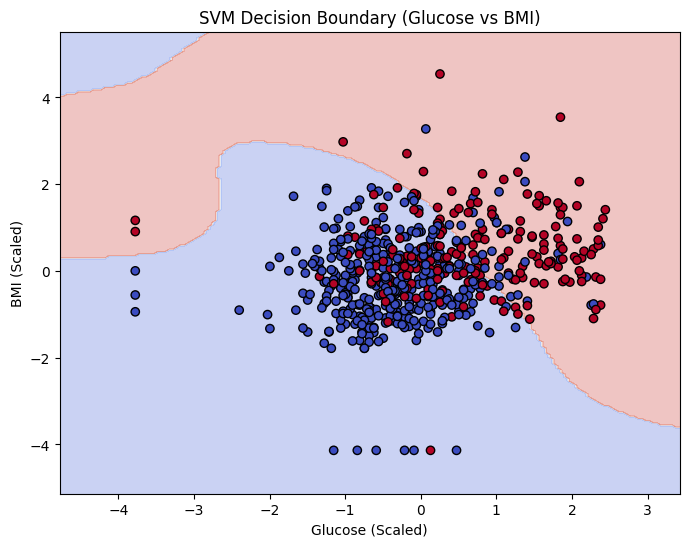

In [13]:
plt.figure(figsize=(8,6))

# Decision boundary
plt.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.3)

# Training data points
plt.scatter(
    X_train_scaled[:, 0],
    X_train_scaled[:, 1],
    c=y_train.to_numpy(),
    cmap='coolwarm',
    edgecolors='k'
)

plt.xlabel("Glucose (Scaled)")
plt.ylabel("BMI (Scaled)")
plt.title("SVM Decision Boundary (Glucose vs BMI)")
plt.show()

**conclusion**
In this experiment, the Support Vector Machine (SVM) algorithm was implemented using the Diabetes dataset loaded from a URL. Data visualization helped in understanding the distribution of diabetic and non-diabetic samples and the relationship between important features such as glucose and BMI. Feature scaling was applied to improve the performance of the SVM model.